In [1]:
import os
from seffnet.utils import get_boxplot
from seffnet.constants import RESOURCES

In [2]:
path = os.path.join(RESOURCES, "robustness_analysis", "3011_experiments_repeats")

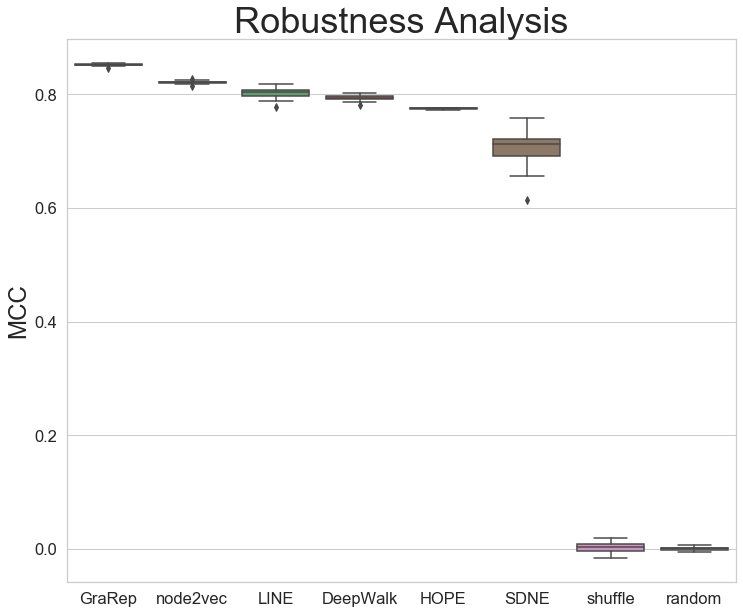

In [3]:
df, boxplot = get_boxplot(dir_path=path)

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6))
boxplot.set_title('Robustness Analysis')


Text(0.5, 1, 'Robustness Analysis')

<Figure size 1152x432 with 0 Axes>

In [4]:
df.groupby('method').mean()

,mcc
method,
DeepWalk,0.793254
GraRep,0.851764
HOPE,0.774983
LINE,0.802268
SDNE,0.706818
node2vec,0.820776
random,0.000260
shuffle,0.002208


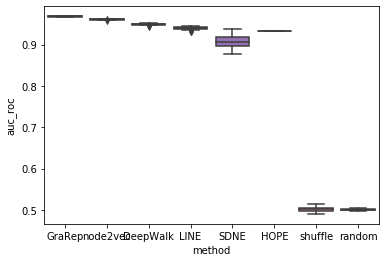

In [16]:
df, boxplot = get_boxplot(dir_path=path, metric='auc_roc')

In [6]:
df.groupby('method').mean()

,auc_roc
method,
DeepWalk,0.948762
GraRep,0.968097
HOPE,0.932976
LINE,0.939966
SDNE,0.906706
node2vec,0.960770
random,0.500137
shuffle,0.501190


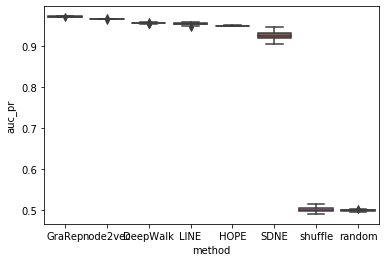

In [7]:
df, boxplot = get_boxplot(dir_path=path, metric='auc_pr')

In [8]:
df.groupby('method').mean()

,auc_pr
method,
DeepWalk,0.957565
GraRep,0.972922
HOPE,0.950609
LINE,0.955626
SDNE,0.927707
node2vec,0.966967
random,0.500018
shuffle,0.502054


In [19]:
from scipy.stats import mannwhitneyu
import pandas as pd

In [32]:
x = []
y = []
y2 = []
for ind, row in df.iterrows():
    if row['method'] == 'node2vec':
        x.append(row['auc_roc'])
    elif row['method'] == 'shuffle':
        y.append(row['auc_roc'])
    elif row['method'] == 'random':
        y2.append(row['auc_roc'])

In [42]:
mannwhitneyu(x,y2, use_continuity=True, alternative='greater')

MannwhitneyuResult(statistic=2500.0, pvalue=3.533035965194466e-18)

In [41]:
3.533035965194466e-18

3.533035965194466e-18